# GALAH DR3 - Comparison to DR2

## Author(s): Sven Buder (SB, WG4)

### History:
200228 SB Created

The aim of this notebook is to provide a comparison of GALAH DR3 with respect to GALAH DR2

In [1]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import os
import sys
import glob
import pickle
import pandas

# Packages to work with FITS and (IDL) SME.out files
import astropy.io.fits as pyfits
from astropy.table import Table
from scipy.io.idl import readsav

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

In [2]:
# read in galah dr3
dr3 = Table.read('../../../catalogs/GALAH_DR3_main.fits')
dr3['A_Li'] = dr3['Li_fe'] + dr3['fe_h'] + 1.05
pdr3 = Table.to_pandas(dr3)

# read in galah dr2
dr2 = Table.read('GALAH_DR2.1_catalog.fits')
dr2['a_li'] = dr2['li_fe'] + dr2['fe_h'] + 1.05
pdr2 = Table.to_pandas(dr2)

# merge them via pandas.merge
df = pandas.merge(pdr3, pdr2, on=['sobject_id','sobject_id'], how='left')

# select the unflagged stars
good_dr3 = (dr3['flag_sp'] == 0)
good_dr2 = (dr2['flag_cannon'] == 0)
good_df = (df['flag_sp'] == 0) & (df['flag_cannon'] == 0)

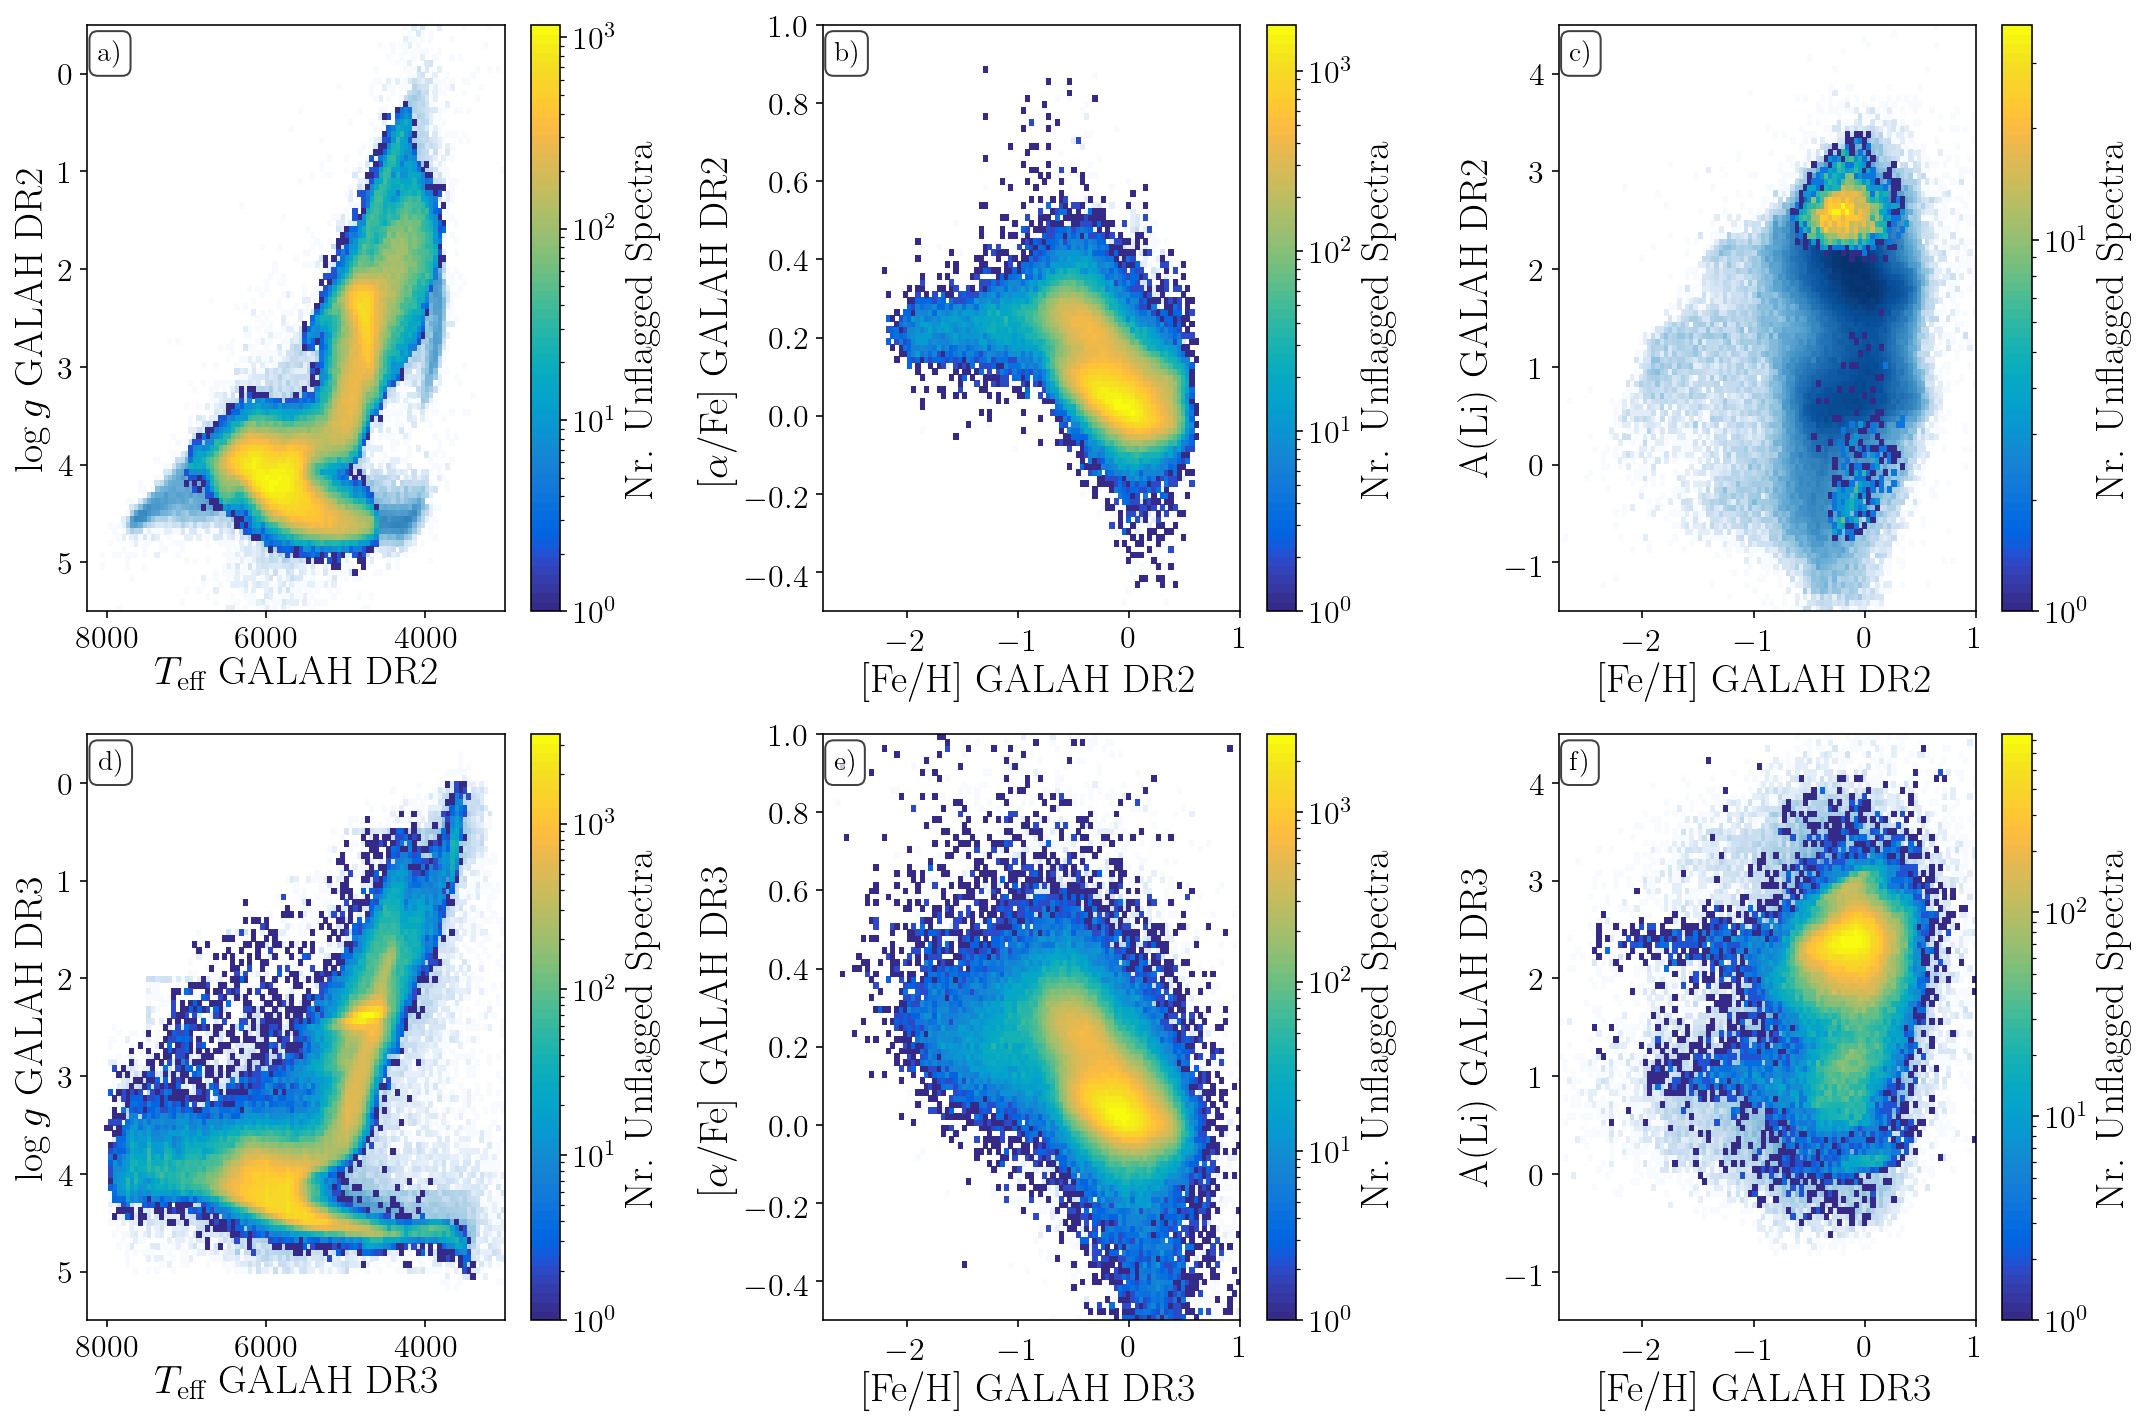

In [20]:
def plot_tefflogg_fehalphafe_fehali(dr2=dr2, dr3=dr3, use='all'):
    """
    We plot 6 panels
    a) Teff vs. logg for GALAH DR2
    b) [Fe/H] vs. [alpha/Fe] for GALAH DR2
    c) [Fe/H] vs. A(Li) for GALAH DR2
    d) Teff vs. logg for GALAH DR3
    e) [Fe/H] vs. [alpha/Fe] for GALAH DR3
    f) [Fe/H] vs. A(Li) for GALAH DR3
    """

    fig, gs = plt.subplots(2,3,figsize=(15,10))

    teff_lim = (3000,8250)
    logg_lim = (-0.5,5.5)
    feh_lim = (-2.75,1)
    alpha_lim = (-0.5,1.0)
    li_lim = (-1.5,4.5)
    props = dict(boxstyle='round', facecolor='w', alpha=0.75)

    kwargs_tefflogg = dict(
        cmin=1,rasterized=True,
        bins=(np.linspace(teff_lim[0],teff_lim[1],100),np.linspace(logg_lim[0],logg_lim[1],100))
    )
    kwargs_fehalphafe = dict(
        cmin=1,rasterized=True,
        bins=(np.linspace(feh_lim[0],feh_lim[1],100),np.linspace(alpha_lim[0],alpha_lim[1],100))
    )
    kwargs_fehali = dict(
        cmin=1,rasterized=True,
        bins=(np.linspace(feh_lim[0],feh_lim[1],100),np.linspace(li_lim[0],li_lim[1],100))
    )
    
    """
    dr2 teff vs. logg   
    """
    ax1 = gs[0,0]

    dr2_all = np.isfinite(dr2['teff']) & np.isfinite(dr2['logg'])
    ax1.hist2d(
        dr2['teff'][dr2_all],
        dr2['logg'][dr2_all],
        cmap='Blues', 
        norm=LogNorm(),
        **kwargs_tefflogg
    )
    
    dr2_unflagged = (dr2['flag_cannon'] == 0)
    p1,x,y,s1 = ax1.hist2d(
        dr2['teff'][dr2_unflagged],
        dr2['logg'][dr2_unflagged],
        cmap=parula,
        norm=LogNorm(),
        **kwargs_tefflogg
        )
    ax1.set_xlabel(r'$T_\text{eff}$ GALAH DR2')
    ax1.set_ylabel(r'$\log g$ GALAH DR2')
    ax1.set_xlim(teff_lim[1],teff_lim[0])
    ax1.set_ylim(logg_lim[1],logg_lim[0])
    c1 = plt.colorbar(s1, ax=ax1)
    c1.set_label('Nr. Unflagged Spectra')
    
    """
    dr3 teff vs. logg   
    """
    ax2 = gs[1,0]
    dr3_all = np.isfinite(dr3['teff']) & np.isfinite(dr3['logg'])
    ax2.hist2d(
        dr3['teff'][dr3_all],
        dr3['logg'][dr3_all],
        cmap='Blues', 
        norm=LogNorm(),
        **kwargs_tefflogg
    )
    
    dr3_unflagged = (dr3['flag_sp'] == 0)
    p2,x,y,s2 = ax2.hist2d(
        dr3['teff'][dr3_unflagged],
        dr3['logg'][dr3_unflagged],
        cmap=parula,
        norm=LogNorm(),
        **kwargs_tefflogg
        )
    ax2.set_xlabel(r'$T_\text{eff}$ GALAH DR3')
    ax2.set_ylabel(r'$\log g$ GALAH DR3')
    ax2.set_xlim(teff_lim[1],teff_lim[0])
    ax2.set_ylim(logg_lim[1],logg_lim[0])
    c2 = plt.colorbar(s2, ax=ax2)
    c2.set_label('Nr. Unflagged Spectra')

    ax1.text(0.025, 0.975, 'a)', transform=ax1.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax2.text(0.025, 0.975, 'd)', transform=ax2.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    """
    dr2 fe_h vs. alpha_fe   
    """
    ax1 = gs[0,1]

    dr2_all = np.isfinite(dr2['fe_h']) & np.isfinite(dr2['alpha_fe'])
    ax1.hist2d(
        dr2['fe_h'][dr2_all],
        dr2['alpha_fe'][dr2_all],
        cmap='Blues', 
        norm=LogNorm(),
        **kwargs_fehalphafe
    )
    
    dr2_unflagged = (dr2['flag_cannon'] == 0) & np.isfinite(dr2['alpha_fe'])
    p1,x,y,s1 = ax1.hist2d(
        dr2['fe_h'][dr2_unflagged],
        dr2['alpha_fe'][dr2_unflagged],
        cmap=parula,
        norm=LogNorm(),
        **kwargs_fehalphafe
        )
    ax1.set_xlabel(r'[Fe/H] GALAH DR2')
    ax1.set_ylabel(r'[$\alpha$/Fe] GALAH DR2')
    ax1.set_xlim(feh_lim[0],feh_lim[1])
    ax1.set_ylim(alpha_lim[0],alpha_lim[1])
    c1 = plt.colorbar(s1, ax=ax1)
    c1.set_label('Nr. Unflagged Spectra')
    
    """
    dr3 fe_h vs. alpha_fe   
    """
    ax2 = gs[1,1]
    dr3_all = np.isfinite(dr3['fe_h']) & np.isfinite(dr3['alpha_fe'])
    ax2.hist2d(
        dr3['fe_h'][dr3_all],
        dr3['alpha_fe'][dr3_all],
        cmap='Blues', 
        norm=LogNorm(),
        **kwargs_fehalphafe
    )
    
    dr3_unflagged = (dr3['flag_sp'] == 0) & np.isfinite(dr3['alpha_fe'])
    p2,x,y,s2 = ax2.hist2d(
        dr3['fe_h'][dr3_unflagged],
        dr3['alpha_fe'][dr3_unflagged],
        cmap=parula,
        norm=LogNorm(),
        **kwargs_fehalphafe
        )
    ax2.set_xlabel(r'[Fe/H] GALAH DR3')
    ax2.set_ylabel(r'[$\alpha$/Fe] GALAH DR3')
    ax2.set_xlim(feh_lim[0],feh_lim[1])
    ax2.set_ylim(alpha_lim[0],alpha_lim[1])
    c2 = plt.colorbar(s2, ax=ax2)
    c2.set_label('Nr. Unflagged Spectra')
    
    ax1.text(0.025, 0.975, 'b)', transform=ax1.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax2.text(0.025, 0.975, 'e)', transform=ax2.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    """
    dr2 fe_h vs. a_li
    """
    ax1 = gs[0,2]

    dr2_all = np.isfinite(dr2['fe_h']) & np.isfinite(dr2['a_li'])
    ax1.hist2d(
        dr2['fe_h'][dr2_all],
        dr2['a_li'][dr2_all],
        cmap='Blues', 
        norm=LogNorm(),
        **kwargs_fehali
    )
    
    dr2_unflagged = (dr2['flag_cannon'] == 0) & (dr2['flag_li_fe'] == 0)
    p1,x,y,s1 = ax1.hist2d(
        dr2['fe_h'][dr2_unflagged],
        dr2['a_li'][dr2_unflagged],
        cmap=parula,
        norm=LogNorm(),
        **kwargs_fehali
        )
    ax1.set_xlabel(r'[Fe/H] GALAH DR2')
    ax1.set_ylabel(r'A(Li) GALAH DR2')
    ax1.set_xlim(feh_lim[0],feh_lim[1])
    ax1.set_ylim(li_lim[0],li_lim[1])
    c1 = plt.colorbar(s1, ax=ax1)
    c1.set_label('Nr. Unflagged Spectra')
    
    """
    dr3 fe_h vs. alpha_fe   
    """
    ax2 = gs[1,2]
    dr3_all = np.isfinite(dr3['fe_h']) & np.isfinite(dr3['A_Li'])
    ax2.hist2d(
        dr3['fe_h'][dr3_all],
        dr3['A_Li'][dr3_all],
        cmap='Blues', 
        norm=LogNorm(),
        **kwargs_fehali
    )
    
    dr3_unflagged = (dr3['flag_sp'] == 0) & (dr3['flag_Li_fe']==0)
    p2,x,y,s2 = ax2.hist2d(
        dr3['fe_h'][dr3_unflagged],
        dr3['A_Li'][dr3_unflagged],
        cmap=parula,
        norm=LogNorm(),
        **kwargs_fehali
        )
    ax2.set_xlabel(r'[Fe/H] GALAH DR3')
    ax2.set_ylabel(r'A(Li) GALAH DR3')
    ax2.set_xlim(feh_lim[0],feh_lim[1])
    ax2.set_ylim(li_lim[0],li_lim[1])
    c2 = plt.colorbar(s2, ax=ax2)
    c2.set_label('Nr. Unflagged Spectra')
    
    ax1.text(0.025, 0.975, 'c)', transform=ax1.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax2.text(0.025, 0.975, 'f)', transform=ax2.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    plt.tight_layout()
    
    return fig
    
# Create comparison for all stars
fig = plot_tefflogg_fehalphafe_fehali()
fig.savefig('galah_dr3_comparison_dr2.pdf',dpi=200,bbox_inches='tight')
fig.savefig('../../../release_paper/figures/galah_dr3_comparison_dr2.pdf',dpi=200,bbox_inches='tight')
fig.savefig('../../../release_paper/figures/galah_dr3_comparison_dr2.png',dpi=200,bbox_inches='tight')